<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.max_columns', 200)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')
house.columns = [i.lower() for i in house.columns]

In [3]:
house.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# dropping agriculture, industrial and commerical zonning area, if any
house.mszoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [5]:
house.drop(house[house.mszoning == 'C (all)'].index.values, axis = 0, inplace = True)
house.reset_index(inplace = True, drop = True)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
id               1450 non-null int64
mssubclass       1450 non-null int64
mszoning         1450 non-null object
lotfrontage      1191 non-null float64
lotarea          1450 non-null int64
street           1450 non-null object
alley            89 non-null object
lotshape         1450 non-null object
landcontour      1450 non-null object
utilities        1450 non-null object
lotconfig        1450 non-null object
landslope        1450 non-null object
neighborhood     1450 non-null object
condition1       1450 non-null object
condition2       1450 non-null object
bldgtype         1450 non-null object
housestyle       1450 non-null object
overallqual      1450 non-null int64
overallcond      1450 non-null int64
yearbuilt        1450 non-null int64
yearremodadd     1450 non-null int64
roofstyle        1450 non-null object
roofmatl         1450 non-null object
exterior1st      1450 non-n

## Filling in missing data

In [7]:
print np.mean(house.lotfrontage)
print np.median(house[house.lotfrontage.notnull()].lotfrontage)

70.0528967254
70.0


In [8]:
# fill null rows in lotfrontage column with median
house.loc[house[house.lotfrontage.isnull()].lotfrontage.index.values,'lotfrontage'] = np.median(house[house.lotfrontage.notnull()].lotfrontage)

In [9]:
# fill null rows in alley column with NA
house.loc[house[house.alley.isnull()].alley.index.values,'alley'] = 'NA'

In [10]:
house.loc[house.masvnrtype.isnull()][['masvnrtype','masvnrarea']]

,masvnrtype,masvnrarea
231,NaN,NaN
525,NaN,NaN
645,NaN,NaN
928,NaN,NaN
965,NaN,NaN
969,NaN,NaN
1234,NaN,NaN
1269,NaN,NaN


In [11]:
# fill null rows in masvnrtype column with None
house.loc[house[house.masvnrtype.isnull()].masvnrtype.index.values,'masvnrtype'] = 'None'

# fill null rows in masvnrarea column with 0
house.loc[house[house.masvnrarea.isnull()].masvnrarea.index.values,'masvnrarea'] = 0.0

In [12]:
house.masvnrtype.value_counts()

None       862
BrkFace    445
Stone      128
BrkCmn      15
Name: masvnrtype, dtype: int64

In [13]:
house.masvnrarea.value_counts()

0.0       859
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: masvnrarea, Length: 327, dtype: int64

In [14]:
house[(house.masvnrtype != 'None') & (house.masvnrarea == 0.0)]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
683,689,20,RL,60.0,8089,Pave,NA,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,6,2007,2007,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,945,Unf,0,474,1419,GasA,Ex,Y,SBrkr,1419,0,0,1419,1,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,2,567,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,392000
1232,1242,20,RL,83.0,9849,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,6,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1689,1689,GasA,Ex,Y,SBrkr,1689,0,0,1689,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,3,954,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,Partial,248328


In [15]:
house.loc[[683, 1232], 'masvnrarea'] = np.median(house[house.masvnrarea != 0]['masvnrarea'])

In [16]:
house[(house.masvnrtype == 'None') & (house.masvnrarea != 0.0)]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
619,625,60,RL,80.0,10400,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
767,774,20,RL,70.0,10150,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
1221,1231,90,RL,70.0,18890,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
1290,1301,60,RL,70.0,10762,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000
1324,1335,160,RM,24.0,2368,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,None,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000


In [17]:
#changing index 767 and 1221, col masvnrarea from 1.0 to 0.0
house.loc[[767,1221], 'masvnrarea'] = 0.0

In [18]:
#filling index 619, 1290, 1324 , col masvnr type from none to brkface
house.loc[[619, 1290, 1324], 'masvnrtype'] = 'BrkFace'

In [19]:
house.bsmtexposure.value_counts()

No    947
Av    219
Gd    134
Mn    112
Name: bsmtexposure, dtype: int64

In [20]:
house.loc[house[house.bsmtexposure.isnull()].index.values, 'bsmtqual':'totalbsmtsf']

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
38,NaN,NaN,NaN,NaN,0,NaN,0,0,0
88,NaN,NaN,NaN,NaN,0,NaN,0,0,0
99,NaN,NaN,NaN,NaN,0,NaN,0,0,0
153,NaN,NaN,NaN,NaN,0,NaN,0,0,0
179,NaN,NaN,NaN,NaN,0,NaN,0,0,0
256,NaN,NaN,NaN,NaN,0,NaN,0,0,0
339,NaN,NaN,NaN,NaN,0,NaN,0,0,0
359,NaN,NaN,NaN,NaN,0,NaN,0,0,0
368,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [21]:
# replace null value in index 940, col bsmtexposure to Av (mode)
house.loc[940, 'bsmtexposure'] = 'Av'

In [22]:
house.loc[house[house.bsmtfintype2.isnull()].index.values, 'bsmtqual':'totalbsmtsf']

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
38,NaN,NaN,NaN,NaN,0,NaN,0,0,0
88,NaN,NaN,NaN,NaN,0,NaN,0,0,0
99,NaN,NaN,NaN,NaN,0,NaN,0,0,0
153,NaN,NaN,NaN,NaN,0,NaN,0,0,0
179,NaN,NaN,NaN,NaN,0,NaN,0,0,0
256,NaN,NaN,NaN,NaN,0,NaN,0,0,0
329,Gd,TA,No,GLQ,1124,NaN,479,1603,3206
339,NaN,NaN,NaN,NaN,0,NaN,0,0,0
359,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [23]:
house.bsmtfintype2.value_counts()

Unf    1246
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: bsmtfintype2, dtype: int64

In [24]:
# replacing null value in index 329, col bsmtfintype2 with Unf
house.loc[329,'bsmtfintype2'] = 'Unf'

In [25]:
house.electrical.value_counts()

SBrkr    1328
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: electrical, dtype: int64

In [26]:
# fill null rows in electrical column with SBrkr (mode)
house.loc[house[house.electrical.isnull()].electrical.index.values,'electrical'] = 'SBrkr'

In [27]:
house.fireplaces.value_counts()

0    681
1    649
2    115
3      5
Name: fireplaces, dtype: int64

In [28]:
np.sum(house.fireplacequ.isnull())
# number of fireplaces with 0 area matches the number of null values in fireplacequ

681

In [29]:
1450 - house.loc[house[house.garagetype.isnull()].index.values, 'garagetype':'garagecond'].shape[0] == 1371

True

In [30]:
1450 - house.loc[house[house.poolqc.isnull()].index.values, 'poolarea':'poolqc'].shape[0] == 7

True

In [31]:
house.miscfeature.value_counts()

Shed    47
Othr     2
Gar2     2
TenC     1
Name: miscfeature, dtype: int64

In [32]:
np.sum(house.miscval.value_counts()[1:])

50L

In [33]:
house.loc[house[(house.miscfeature.notnull()) & (house.miscval == 0) ].index.values, 'miscfeature':'miscval']
# there are 2 missing values in miscval when there is a extra feature

,miscfeature,miscval
866,Othr,0
1191,Shed,0


In [34]:
# fill missing miscval of miscfeature shed with median value of shed
house.loc[1191, 'miscval'] = np.median(house[house.miscfeature  == 'Shed'].miscval)

In [35]:
house[house.miscfeature  == 'Othr'].miscval

700    3500.0
866       0.0
Name: miscval, dtype: float64

In [36]:
# fill missing miscval of miscfeature othr with the only othr value
house.loc[866, 'miscval'] = 3500

## Creating new features

In [37]:
# creating a new feature, age = yearsold - year built 
house['age'] = house.yrsold - house.yearbuilt
house.drop('yearbuilt', inplace = True, axis = 1)
# creating new feature, age_remod = yearsold - yearremodel
house['age_remod'] = house.yrsold - house.yearremodadd
house.drop('yearremodadd', inplace = True, axis = 1)
# creating new feature, garage_age = yearsold - garageyrblt
house['garage_age'] = house.yrsold - house.garageyrblt
house.drop('garageyrblt', inplace = True, axis = 1)

# creating new feature, totalbathrm = bsmtfullbath + bsmthalfbath * 0.5 + fullbath + halfbath * 0.5
house['totalbath'] = house.bsmtfullbath + house.bsmthalfbath * 0.5 + house.fullbath + house.halfbath * 0.5
house.drop('bsmtfullbath', inplace = True, axis = 1)
house.drop('bsmthalfbath', inplace = True, axis = 1)
house.drop('fullbath', inplace = True, axis = 1)
house.drop('halfbath', inplace = True, axis = 1)

In [38]:
house.kitchenabvgr.value_counts()

1    1383
2      64
3       2
0       1
Name: kitchenabvgr, dtype: int64

In [39]:
house.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,age,age_remod,garage_age,totalbath
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0.0,2,2008,WD,Normal,208500,5,5,5.0,3.5
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0.0,5,2007,WD,Normal,181500,31,31,31.0,2.5
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0.0,9,2008,WD,Normal,223500,7,6,7.0,3.5
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml,140000,91,36,8.0,2.0
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0.0,12,2008,WD,Normal,250000,8,8,8.0,3.5


In [40]:
#fill null with -1
house.fillna(-1, inplace = True)
house.alley.replace('NA', -1, inplace = True)
house.masvnrtype.replace('None', -1, inplace = True)
#fill 0 value with -1
#house.masvnrarea.replace(0, -1, inplace = True)
#house.loc[house[house.bsmtqual == -1].index.values,'bsmtfinsf1'] = -1
#house.loc[house[house.bsmtqual == -1].index.values,'bsmtfinsf2'] = -1
#house.loc[house[house.bsmtqual == -1].index.values,'bsmtunfsf'] = -1
#house.loc[house[house.bsmtqual == -1].index.values,'totalbsmtsf'] = -1
#house['2ndflrsf'].replace(0, -1, inplace = True)

## Identifying columns that contains 90% of the same value and dropping them

In [41]:
house.lowqualfinsf.value_counts()

0      1425
80        3
360       2
371       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
572       1
528       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
514       1
515       1
384       1
Name: lowqualfinsf, dtype: int64

In [42]:
house.poolarea.value_counts()

0      1443
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: poolarea, dtype: int64

In [43]:
house['3ssnporch'].value_counts()

0      1426
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3ssnporch, dtype: int64

In [44]:
house.screenporch.value_counts()

0      1335
192       6
120       5
224       5
180       4
189       4
160       3
147       3
126       3
144       3
168       3
90        3
142       2
170       2
176       2
184       2
198       2
200       2
216       2
100       2
259       2
288       2
140       1
155       1
119       1
163       1
161       1
40        1
53        1
122       1
       ... 
175       1
178       1
410       1
396       1
385       1
374       1
322       1
312       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
222       1
220       1
210       1
204       1
197       1
190       1
185       1
440       1
182       1
Name: screenporch, Length: 75, dtype: int64

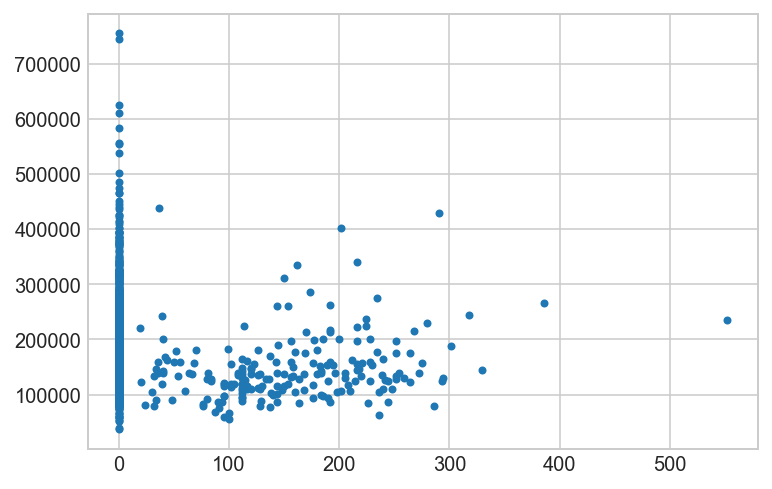

In [45]:
x = house.enclosedporch
y = house.saleprice
plt.plot(x, y, marker = '.', linestyle = 'none')

In [46]:
house.miscfeature.value_counts()

-1      1398
Shed      47
Othr       2
Gar2       2
TenC       1
Name: miscfeature, dtype: int64

In [47]:
house.kitchenabvgr.value_counts()

1    1383
2      64
3       2
0       1
Name: kitchenabvgr, dtype: int64

In [48]:
house.street.value_counts()

Pave    1446
Grvl       4
Name: street, dtype: int64

In [49]:
house.alley.value_counts()

-1      1361
Grvl      50
Pave      39
Name: alley, dtype: int64

In [50]:
house.landcontour.value_counts()

Lvl    1305
Bnk      62
HLS      49
Low      34
Name: landcontour, dtype: int64

In [51]:
house.utilities.value_counts()

AllPub    1449
NoSeWa       1
Name: utilities, dtype: int64

In [52]:
house.landslope.value_counts()

Gtl    1375
Mod      62
Sev      13
Name: landslope, dtype: int64

In [53]:
house.condition2.value_counts()

Norm      1436
Feedr        5
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: condition2, dtype: int64

In [54]:
house.roofmatl.value_counts()

CompShg    1424
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: roofmatl, dtype: int64

In [55]:
house.bsmtcond.value_counts()

TA    1303
Gd      65
Fa      43
-1      37
Po       2
Name: bsmtcond, dtype: int64

In [56]:
house.heating.value_counts()

GasA     1419
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: heating, dtype: int64

In [57]:
house.centralair.value_counts()

Y    1361
N      89
Name: centralair, dtype: int64

In [58]:
house.electrical.value_counts()

SBrkr    1329
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: electrical, dtype: int64

In [59]:
house.functional.value_counts()

Typ     1350
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: functional, dtype: int64

In [60]:
house.paveddrive.value_counts()

Y    1335
N      85
P      30
Name: paveddrive, dtype: int64

In [61]:
house.poolqc.value_counts()

-1    1443
Gd       3
Ex       2
Fa       2
Name: poolqc, dtype: int64

In [62]:
house.salecondition.value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: salecondition, dtype: int64

In [63]:
house.drop('lowqualfinsf', inplace = True, axis = 1)
house.drop('poolarea', inplace = True, axis = 1)
house.drop('3ssnporch', inplace = True, axis = 1)
house.drop('screenporch', inplace = True, axis = 1)
house.drop('miscfeature', inplace = True, axis = 1)
house.drop('miscval', inplace = True, axis = 1)
house.drop('bsmtfinsf1', inplace = True, axis = 1)
house.drop('bsmtfinsf2', inplace = True, axis = 1)
house.drop('bsmtunfsf', inplace = True, axis = 1)
house.drop('1stflrsf', inplace = True, axis = 1)
house.drop('2ndflrsf', inplace = True, axis = 1)
house.drop('kitchenabvgr', inplace = True, axis = 1)
house.drop('street', inplace = True, axis = 1)
house.drop('alley', inplace = True, axis = 1)
house.drop('landcontour', inplace = True, axis = 1)
house.drop('utilities', inplace = True, axis = 1)
house.drop('landslope', inplace = True, axis = 1)
house.drop('condition2', inplace = True, axis = 1)
house.drop('roofmatl', inplace = True, axis = 1)
house.drop('bsmtcond', inplace = True, axis = 1)
house.drop('heating', inplace = True, axis = 1)
house.drop('centralair', inplace = True, axis = 1)
house.drop('electrical', inplace = True, axis = 1)
house.drop('functional', inplace = True, axis = 1)
house.drop('paveddrive', inplace = True, axis = 1)
house.drop('poolqc', inplace = True, axis = 1)

## Change quality and condition ratings to numerals

In [64]:
house['exterqual'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5 for i in house.exterqual]
house['extercond'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5  for i in house.extercond]
house['bsmtqual'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5 if i == 'Ex' else -1 for i in house.bsmtqual]
house['bsmtexposure'] = [1 if i == 'No' else 2 if i == 'Mn' else 3 if i == 'Av' else 4 if i == 'Gd' else -1 for i in house.bsmtexposure]
house['bsmtfintype1'] = [1 if i == 'Unf' else 2 if i == 'LwQ' else 3 if i == 'Rec' else 4 if i == 'BLQ' else 5 if i == 'ALQ' else 6 if i == 'GLQ' else -1 for i in house.bsmtfintype1]
house['bsmtfintype2'] = [1 if i == 'Unf' else 2 if i == 'LwQ' else 3 if i == 'Rec' else 4 if i == 'BLQ' else 5 if i == 'ALQ' else 6 if i == 'GLQ' else -1 for i in house.bsmtfintype2]
house['heatingqc'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5 for i in house.heatingqc]
house['kitchenqual'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5 for i in house.kitchenqual]
house['fireplacequ'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5 if i == 'Ex' else -1 for i in house.fireplacequ]
house['garagefinish'] = [1 if i == 'Unf' else 2 if i == 'RFn' else 3 if i == 'Fin' else -1 for i in house.garagefinish]
house['garagequal'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5 if i == 'Ex' else -1 for i in house.garagequal]
house['garagecond'] = [1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5 if i == 'Ex' else -1 for i in house.garagecond]
house['fence'] = [1 if i == 'MnWw' else 2 if i == 'GdWo' else 3 if i == 'MnPrv' else 4 if i == 'GdPrv' else -1 for i in house.fence]

## Differentiating renovable variables and fixed variables

In [65]:
reno_list = ['id','saleprice','yrsold','overallqual','overallcond','roofstyle','exterior1st','exterior2nd','exterqual','extercond','bsmtfintype1','bsmtfintype2','heatingqc','kitchenqual','fireplacequ','garagefinish','garagequal','garagecond','fence']
fix_list = [i for i in list(house.columns) if i not in ['overallqual','overallcond','roofstyle','exterior1st','exterior2nd','exterqual','extercond','bsmtfintype1','bsmtfintype2','heatingqc','kitchenqual','fireplacequ','garagefinish','garagequal','garagecond','fence']] 
house_fix = house[fix_list]

In [66]:
house_fix.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,lotshape,lotconfig,neighborhood,condition1,bldgtype,housestyle,masvnrtype,masvnrarea,foundation,bsmtqual,bsmtexposure,totalbsmtsf,grlivarea,bedroomabvgr,totrmsabvgrd,fireplaces,garagetype,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,mosold,yrsold,saletype,salecondition,saleprice,age,age_remod,garage_age,totalbath
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,BrkFace,196.0,PConc,4,1,856,1710,3,8,0,Attchd,2,548,0,61,0,2,2008,WD,Normal,208500,5,5,5.0,3.5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,-1,0.0,CBlock,4,4,1262,1262,3,6,1,Attchd,2,460,298,0,0,5,2007,WD,Normal,181500,31,31,31.0,2.5
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,BrkFace,162.0,PConc,4,2,920,1786,3,6,1,Attchd,2,608,0,42,0,9,2008,WD,Normal,223500,7,6,7.0,3.5
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,-1,0.0,BrkTil,3,1,756,1717,3,7,1,Detchd,3,642,0,35,272,2,2006,WD,Abnorml,140000,91,36,8.0,2.0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,BrkFace,350.0,PConc,4,3,1145,2198,4,9,1,Attchd,3,836,192,84,0,12,2008,WD,Normal,250000,8,8,8.0,3.5


## Get dummies for categorical variables

In [67]:
mssubclass_d = pd.get_dummies(house.mssubclass, prefix = 'mssubclass', drop_first = True)
mszoning_d = pd.get_dummies(house.mszoning, prefix = 'mszoning', drop_first = True)
lotshape_d = pd.get_dummies(house.lotshape, prefix = 'lotshape', drop_first = True)
lotconfig_d = pd.get_dummies(house.lotconfig, prefix = 'lotconfig', drop_first = True)
neighborhood_d = pd.get_dummies(house.neighborhood, prefix = 'neighborhood', drop_first = True)
condition1_d = pd.get_dummies(house.condition1, prefix ='condition1', drop_first = True)
bldgtype_d = pd.get_dummies(house.bldgtype, prefix = 'bldgtype', drop_first = True)
housestyle_d = pd.get_dummies(house.housestyle, prefix = 'housestyle', drop_first = True)
masvnrtype_d = pd.get_dummies(house.masvnrtype, prefix = 'masvnrtype')
masvnrtype_d.drop('masvnrtype_-1', inplace = True, axis = 1)
foundation_d = pd.get_dummies(house.foundation, prefix = 'foundation', drop_first = True)
garagetype_d = pd.get_dummies(house.garagetype, prefix = 'garagetype')
garagetype_d.drop('garagetype_-1', inplace = True, axis = 1)
saletype_d = pd.get_dummies(house.saletype, prefix = 'saletype', drop_first = True)
salecondition_d = pd.get_dummies(house.salecondition, prefix = 'salecond', drop_first = True)

house_fix = pd.concat([house_fix, mssubclass_d, mszoning_d, lotshape_d, lotconfig_d, neighborhood_d,\
                      condition1_d, bldgtype_d, housestyle_d, masvnrtype_d, foundation_d, garagetype_d,\
                      saletype_d, salecondition_d], axis =1)

house_fix_drop = house_fix[['mssubclass','mszoning','lotshape','lotconfig','neighborhood','condition1','bldgtype','housestyle','masvnrtype','foundation','garagetype','saletype','salecondition']]
house_fix.drop(house_fix_drop, axis = 1, inplace = True)

In [68]:
house_fix.head()

,id,lotfrontage,lotarea,masvnrarea,bsmtqual,bsmtexposure,totalbsmtsf,grlivarea,bedroomabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,mosold,yrsold,saleprice,age,age_remod,garage_age,totalbath,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_RH,mszoning_RL,mszoning_RM,lotshape_IR2,lotshape_IR3,lotshape_Reg,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecond_AdjLand,salecond_Alloca,salecond_Family,salecond_Normal,salecond_Partial
0,1,65.0,8450,196.0,4,1,856,1710,3,8,0,2,548,0,61,0,2,2008,208500,5,5,5.0,3.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,0.0,4,4,1262,1262,3,6,1,2,460,298,0,0,5,2007,181500,31,31,31.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,162.0,4,2,920,1786,3,6,1,2,608,0,42,0,9,2008,223500,7,6,7.0,3.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,0.0,3,1,756,1717,3,7,1,3,642,0,35,272,2,2006,140000,91,36,8.0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,350.0,4,3,1145,2198,4,9,1,3,836,192,84,0,12,2008,250000,8,8,8.0,3.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [69]:
house_fix_train = house_fix.loc[house_fix[house_fix.yrsold < 2010].index.values,:]
house_fix_train.reset_index(drop = True, inplace = True)
house_fix_test = house_fix.loc[house_fix[house_fix.yrsold == 2010].index.values,:]
house_fix_test.reset_index(drop = True, inplace = True)

In [70]:
# training set
y_train = house_fix_train.saleprice.values
X_train = house_fix_train[[i for i in house_fix_train.columns if i not in ['saleprice', 'id', 'yrsold']]]

#test set
y_test = house_fix_test.saleprice.values
X_test = house_fix_test[[i for i in house_fix_test.columns if i not in ['saleprice', 'id', 'yrsold']]]

# all rows
y = house_fix.saleprice.values
X = house_fix[[i for i in house_fix_test.columns if i not in ['saleprice', 'id', 'yrsold']]]

In [71]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [72]:
# Scaling of X matrix
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

## Linear Regression

In [73]:
lr = linear_model.LinearRegression()

lr.fit(Xs_train, y_train)

lr_train_score = lr.score(Xs_train, y_train)
print 'R2 of training set:', lr_train_score

lrcv_train_scores = cross_val_score(lr, Xs_train, y_train, cv = 5)
print '5-folds cross-val (training set):',lrcv_train_scores, np.mean(lrcv_train_scores)

lr_test_score = lr.score(Xs_test, y_test)
print 'R2 of test set:', lr_test_score

# When cross validating with 5-folds, the mean R2 is negative. 
# Linear regression does not seem to be a robust model for predicting sales price

R2 of training set: 0.84806489189
5-folds cross-val (training set): [  8.45718468e-01  -1.01308017e+18  -2.08313170e+22   7.90455225e-01
   6.57496896e-01] -4.16646602386e+21
R2 of test set: 0.846677582584


## Introducing RFE

In [74]:
from sklearn.feature_selection import RFECV

In [75]:
lr = linear_model.LinearRegression()

selector = RFECV(lr, step=1, cv=5)
selector = selector.fit(Xs_train, y_train)

print selector.support_
print selector.ranking_

[False False  True  True  True False  True  True False  True  True False
 False False False False  True  True False  True False False False False
 False False False False False  True  True  True False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False  True  True
 False False False False  True  True False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False]
[ 3 15  1  1  1 27  1  1  7  1  1 95 38 58 90 63  1  1 44  1 33 68 70 57  5
 93 73 54 52  1  1  1  4 80 78 37 36  8 17 65 34 21 64 89 74 18 11 48 60  1
 22 28 77 91 32 62 25 49  1  1 40 39 61 85  1  1 87  9 10 67 88 35 24 82 92
 66 19  6 46 47 26  1 71 72 84 51 53 14 29 75 12 13  1 76 86 16 41 45 43 31
 

In [76]:
# the column names correspond to the one below.  RFECV only excluded a few features.
rfecv_columns = np.array(X_train.columns)[selector.support_]
rfecv_columns

array(['masvnrarea', 'bsmtqual', 'bsmtexposure', 'grlivarea',
       'bedroomabvgr', 'fireplaces', 'garagecars', 'age', 'age_remod',
       'totalbath', 'mssubclass_90', 'mssubclass_120', 'mssubclass_160',
       'neighborhood_Crawfor', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'housestyle_1Story', 'foundation_Slab'], dtype=object)

In [77]:
# standardise the X_train set
X_train_rfe = X_train[rfecv_columns]
Xs_train_rfe = ss.fit_transform(X_train_rfe)

X_test_rfe = X_test[rfecv_columns]
Xs_test_rfe = ss.transform(X_test_rfe)

In [78]:
# using linear regression model
lr.fit(Xs_train_rfe, y_train)

# calculating R2 of training set
lr_train_score_rfe = lr.score(Xs_train_rfe, y_train)
print 'R2 of training set:',lr_train_score_rfe

lrcv_train_score_rfe = cross_val_score(lr, Xs_train_rfe, y_train, cv =5)
print '5-fold cross-val (training set):',lrcv_train_score_rfe, np.mean(lrcv_train_score_rfe)

# calculating R2 of test set
lr_test_score_rfe = lr.score(Xs_test_rfe, y_test)
print 'R2 of test set:',lr_test_score_rfe


R2 of training set: 0.822344338274
5-fold cross-val (training set): [ 0.85771383  0.80507733  0.82824862  0.8355219   0.72595569] 0.810503473137
R2 of test set: 0.84464841122


In [79]:
# What are the best coefficients according to a model using linear regression?
coeffs = pd.DataFrame(lr.coef_, index=rfecv_columns)
coeffs.columns = ['lr_coefs']
coeffs_abs = coeffs.abs().sort_values('lr_coefs', ascending=False)
print 'No. of coeffs:',len(coeffs_abs)
coeffs_abs

No. of coeffs: 20


,lr_coefs
grlivarea,33711.930130
neighborhood_NridgHt,14919.622068
neighborhood_NoRidge,10095.156048
neighborhood_StoneBr,9723.644395
garagecars,9218.815497
bsmtexposure,9200.096825
housestyle_1Story,8398.125499
bsmtqual,7869.133882
totalbath,7292.650572
mssubclass_120,7206.495139


In [80]:
# observing the difference between y_hat and y
predicted_y = lr.predict(Xs_test_rfe)
compare = pd.DataFrame({'true_y': y_test, 'predicted_y':predicted_y, 'delta%': abs((predicted_y - y_test)/y_test)*100}, columns = ['true_y','predicted_y','delta%'])
print 'Average % delta:', np.mean(compare['delta%'])
compare

Average % delta: 12.2078750006


,true_y,predicted_y,delta%
0,149000,147638.866199,0.913513
1,154000,147093.259762,4.484896
2,134800,131470.935547,2.469632
3,306000,310004.319700,1.308601
4,165500,171584.919584,3.676689
5,109000,128170.203409,17.587343
6,319900,278681.872561,12.884691
7,110000,122784.538536,11.622308
8,140000,141091.411240,0.779579
9,180000,268413.222361,49.118457


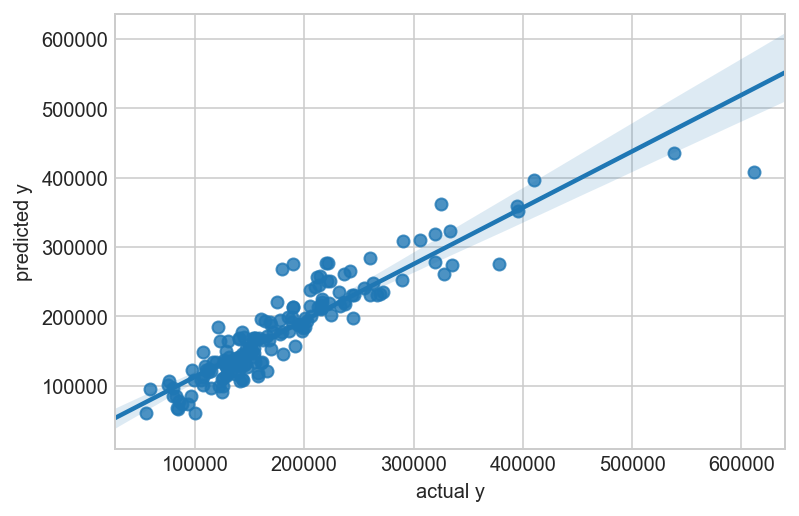

In [81]:
sns.regplot(y_test, predicted_y, fit_reg=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')

## Elastic Net Regression

In [82]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = linear_model.ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=5, verbose=1, n_jobs = -1)

optimal_enet.fit(Xs_train, y_train)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

600.406438682
1.0


In [83]:
enet = linear_model.ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet.fit(Xs_train, y_train)

enet_train_score = enet.score(Xs_train, y_train)
print 'R2 of training set:', enet_train_score

enetcv_train_scores = cross_val_score(enet, Xs_train, y_train, cv = 5)
print '5-folds cross-val (training set):', enetcv_train_scores, np.mean(enetcv_train_scores)

enet_test_score = enet.score(Xs_test, y_test)
print 'R2 of test set:', enet_test_score

R2 of training set: 0.84114816379
5-folds cross-val (training set): [ 0.86356641  0.79493339  0.8293183   0.82871717  0.66337743] 0.795982538863
R2 of test set: 0.851514235374


In [84]:
# What are the best coefficients according to a model using lasso?
coeffs = pd.DataFrame(enet.coef_, index=X_train.columns)
coeffs.columns = ['lasso_coefs']
coeffs = coeffs[coeffs.lasso_coefs > 0]
coeffs_abs = coeffs.abs().sort_values('lasso_coefs', ascending=False)
print 'No. of coeffs:',len(coeffs_abs)
coeffs_abs

No. of coeffs: 38


,lasso_coefs
grlivarea,31230.967781
neighborhood_NridgHt,13365.549300
neighborhood_NoRidge,9515.415970
garagecars,8876.034999
neighborhood_StoneBr,8218.583476
totalbath,7647.474378
bsmtexposure,7556.948935
housestyle_1Story,6601.861714
bsmtqual,5922.235345
fireplaces,5006.366124


In [85]:
predicted_y = enet.predict(Xs_test)
compare = pd.DataFrame({'true_y': y_test, 'predicted_y':predicted_y, 'delta%': abs((predicted_y - y_test)/y_test)*100}, columns = ['true_y','predicted_y','delta%'])
print 'Average % delta:', np.mean(compare['delta%'])
compare

Average % delta: 11.1152228302


,true_y,predicted_y,delta%
0,149000,155006.266702,4.031051
1,154000,152959.348845,0.675748
2,134800,136961.904556,1.603787
3,306000,302539.028060,1.131037
4,165500,174285.574981,5.308505
5,109000,131584.124763,20.719381
6,319900,273905.724953,14.377704
7,110000,120310.450251,9.373137
8,140000,139642.981018,0.255014
9,180000,262016.219124,45.564566


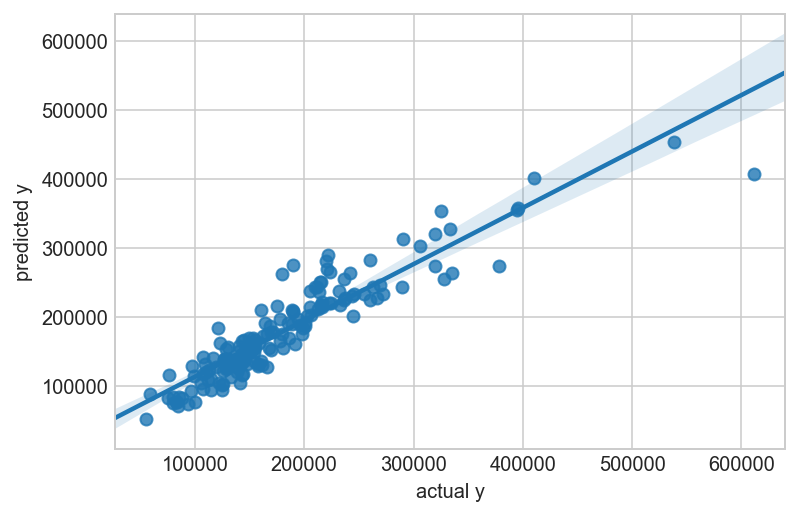

In [86]:
sns.regplot(y_test, predicted_y, fit_reg=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')

In [87]:
# obtaining residuals from first model
predicted_y_train = lr.predict(Xs_train_rfe)
predicted_y_test = lr.predict(Xs_test_rfe)
house_fix_train['predicted_y'] = predicted_y_train
house_fix_train['residual_y'] = house_fix_train.saleprice - house_fix_train.predicted_y
house_fix_test['predicted_y'] = predicted_y_test
house_fix_test['residual_y'] = house_fix_test.saleprice - house_fix_test.predicted_y

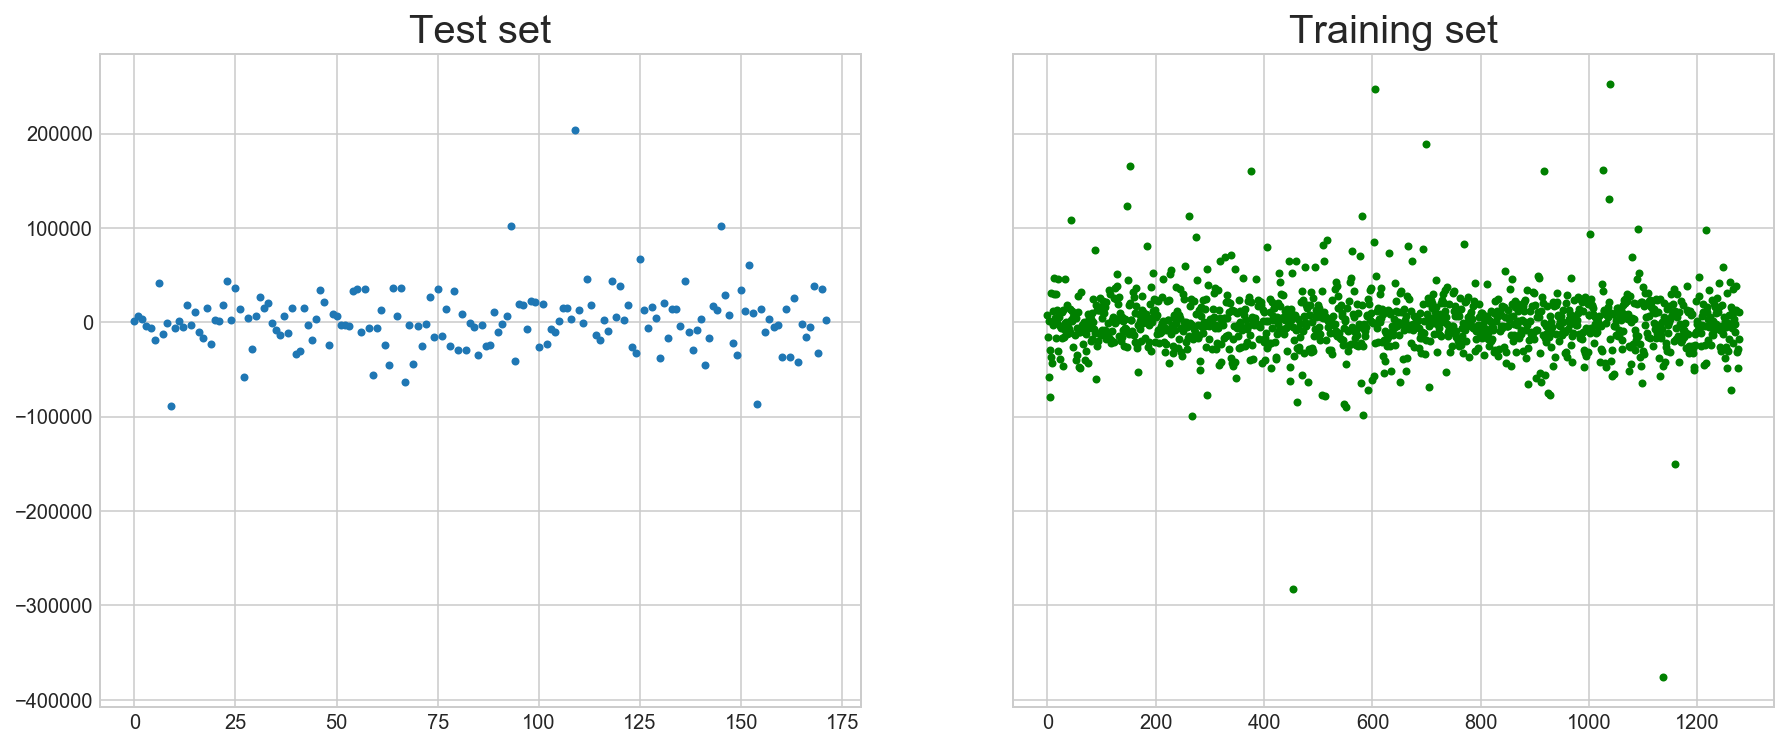

In [88]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize = (15,6))
ax1.plot(house_fix_test.residual_y, marker = '.', linestyle = 'none')
ax1.set_title('Test set', fontsize = 20)
ax2.plot(house_fix_train.residual_y, marker = '.', linestyle = 'none', c = 'g')
ax2.set_title('Training set', fontsize = 20)

# Elastic Net Regression yield the best model

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [89]:
# creating renovate-able dataframe
house_reno = house[reno_list]
roofstyle_d = pd.get_dummies(house_reno.roofstyle, drop_first = True, prefix = 'roofstyle')
exter1st_d = pd.get_dummies(house_reno.exterior1st, drop_first = True, prefix = 'exter1st')
exter2nd_d = pd.get_dummies(house_reno.exterior2nd, drop_first = True, prefix = 'exter2nd')
house_reno = pd.concat([house_reno, roofstyle_d, exter1st_d, exter2nd_d], axis = 1)
house_reno.drop('roofstyle', axis = 1, inplace = True)
house_reno.drop('exterior1st', axis = 1, inplace = True)
house_reno.drop('exterior2nd', axis = 1, inplace = True)

# creating training set, houses sold before 2010, and test set, houses sold in 2010
house_reno_train = house_reno.iloc[house_reno[house_reno.yrsold < 2010].index.values,:]
house_reno_test = house_reno.iloc[house_reno[house_reno.yrsold == 2010].index.values,:]
print house_reno_train.shape
print house_reno_test.shape

(1278, 50)
(172, 50)


## Linear Regression

In [90]:
# determining target and X matrix
y_m2_train = house_fix_train.residual_y
X_m2_train = house_reno_train[[i for i in house_reno_train.columns if i not in ['id','saleprice','yrsold']]]

y_m2_test = house_fix_test.residual_y
X_m2_test = house_reno_test[[i for i in house_reno_test.columns if i not in ['id','saleprice','yrsold']]]

# scaling X matrix
Xs_m2_train = ss.fit_transform(X_m2_train)
Xs_m2_test = ss.transform(X_m2_test)

print Xs_m2_train.shape
print Xs_m2_test.shape
print y_m2_train.shape
print y_m2_test.shape

(1278, 47)
(172, 47)
(1278,)
(172,)


In [91]:
lr_m2 = linear_model.LinearRegression()
lr_m2.fit(Xs_m2_train, y_m2_train)

lr_m2_train_score = lr_m2.score(Xs_m2_train, y_m2_train)
print 'R2 of training set:', lr_m2_train_score

lrcv_m2_train_score = cross_val_score(lr_m2, Xs_m2_train, y_m2_train, cv = 5)
print '5-fold cross-val (training set):',lrcv_m2_train_score, np.mean(lrcv_m2_train_score)

lr_m2_test_score = lr_m2.score(Xs_m2_test, y_m2_test)
print 'R2 of test set:', lr_m2_test_score 

R2 of training set: 0.134122075319
5-fold cross-val (training set): [  8.24448056e-02   2.64434197e-02  -2.13794259e+25   2.06849103e-02
  -1.65451433e+25] -7.58491384176e+24
R2 of test set: 0.0550910998809


## RFE

In [92]:
selector_m2 = RFECV(lr_m2, step=1, cv=5)
selector_m2 = selector_m2.fit(Xs_m2_train, y_m2_train)

print selector_m2.support_
print selector_m2.ranking_

[ True  True False False False False False False False False  True  True
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False]
[ 1  1 26 21 23 24 29 17  3 22  1  1 36 31 32 20 33 41 42 16  1 34 12 19 10
  5 14 30 35  1  9 27 40 15  7 38 11 39  6  4 28 13 37 18  2  8 25]


In [93]:
# the column names correspond to the one below.  RFECV only excluded a few features.
rfecv_m2_columns = np.array(X_m2_train.columns)[selector_m2.support_]
rfecv_m2_columns

array(['overallqual', 'overallcond', 'garagequal', 'garagecond',
       'exter1st_BrkFace', 'exter1st_VinylSd'], dtype=object)

In [94]:
# standardise the X_train set
X_m2_train_rfe = X_m2_train[rfecv_m2_columns]
Xs_m2_train_rfe = ss.fit_transform(X_m2_train_rfe)
X_m2_test_rfe = X_m2_test[rfecv_m2_columns]
Xs_m2_test_rfe = ss.transform(X_m2_test_rfe)

In [95]:
lr_m2.fit(Xs_m2_train_rfe, y_m2_train)

lrrfe_m2_train_score = lr_m2.score(Xs_m2_train_rfe, y_m2_train)
print 'R2 of training score:', lrrfe_m2_train_score

lrrfecv_m2_train_score = cross_val_score(lr_m2, Xs_m2_train_rfe, y_m2_train, cv = 5)
print '5-fold cross-val (training set):',lrrfecv_m2_train_score, np.mean(lrrfecv_m2_train_score)

lrrfe_m2_test_score = lr_m2.score(Xs_m2_test_rfe, y_m2_test)
print 'R2 of test score:', lrrfe_m2_test_score

R2 of training score: 0.0957003268634
5-fold cross-val (training set): [ 0.11764395  0.08496047  0.11261117  0.074975    0.04214121] 0.0864663619048
R2 of test score: 0.0259389233447


In [96]:
# What are the best coefficients according to a model using linear regression?
coeffs = pd.DataFrame(lr_m2.coef_, index=rfecv_m2_columns)
coeffs.columns = ['lr_coefs']
coeffs_abs = coeffs.abs().sort_values('lr_coefs', ascending=False)
print 'No. of coeffs:',len(coeffs_abs)
coeffs_abs

No. of coeffs: 6


,lr_coefs
garagecond,8063.517192
overallqual,7522.634971
overallcond,6309.262529
garagequal,6220.879783
exter1st_BrkFace,4529.916596
exter1st_VinylSd,1624.446230


## Elastic Net Regression

In [97]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = linear_model.ElasticNetCV(l1_ratio = l1_ratios, n_alphas = 100, cv = 5, verbose =1, n_jobs=-1)

optimal_enet.fit(Xs_m2_train, y_m2_train)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

977.674831844
1.0


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [98]:
enet_m2 = linear_model.ElasticNet(alpha = optimal_enet.alpha_, l1_ratio = optimal_enet.l1_ratio_)

enet_m2.fit(Xs_m2_train, y_m2_train)

enet_m2_train_score = enet_m2.score(Xs_m2_train, y_m2_train)
print 'R2 of training set:', enet_m2_train_score

enetcv_m2_train_score = cross_val_score(enet_m2, Xs_m2_train, y_m2_train, cv = 5)
print '5-fold cross-val (training set):', enetcv_m2_train_score, np.mean(enetcv_m2_train_score)

enet_m2_test_score = enet_m2.score(Xs_m2_test, y_m2_test)
print 'R2 of test set:', enet_m2_test_score

R2 of training set: 0.105397381063
5-fold cross-val (training set): [ 0.09042804  0.06696476  0.09357612  0.07603964  0.04008347] 0.0734184041962
R2 of test set: 0.0535314537339


................................................................................................................................................................................................................................................................................................................................................

In [99]:
# What are the best coefficients according to a model using linear regression?
coeffs = pd.DataFrame(enet_m2.coef_, index=X_m2_train.columns)
coeffs.columns = ['lr_coefs']
coeffs = coeffs[coeffs.lr_coefs>0]
coeffs_abs = coeffs.abs().sort_values('lr_coefs', ascending=False)
print 'No. of coeffs:',len(coeffs_abs)
coeffs_abs

No. of coeffs: 10


................................................

,lr_coefs
overallqual,5471.668724
overallcond,5467.499316
exter1st_BrkFace,3085.883117
exter2nd_ImStucc,1049.546175
exter2nd_BrkFace,987.876062
kitchenqual,959.801274
exter2nd_CmentBd,624.344799
roofstyle_Hip,456.998888
bsmtfintype1,77.254340
exter2nd_MetalSd,35.925797


....................................................

# Elastic Net Regression Yield the best model

......................................................................................................................................................................................................................................................................................................................

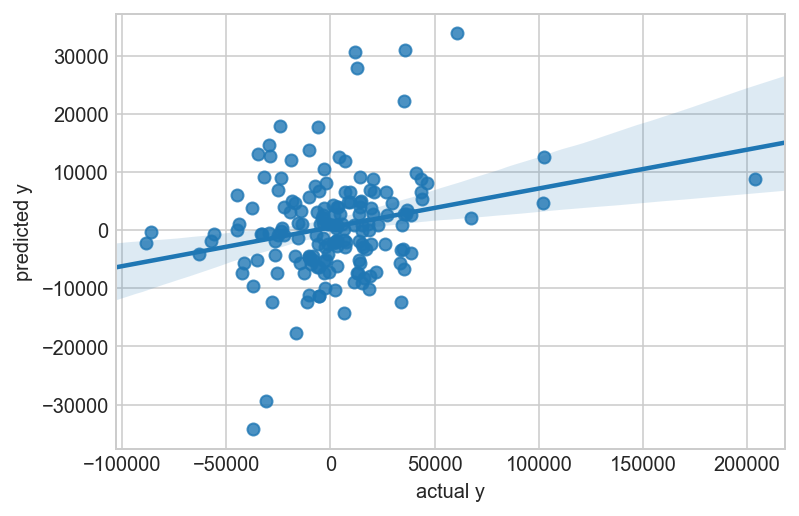

In [100]:
predicted_m2_y = enet_m2.predict(Xs_m2_test)

sns.regplot(y_m2_test, predicted_m2_y, fit_reg=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')

In [101]:
# model 2 is trying to account for the residuals of model 1.
# using the training set, my model 2 yield a R2 of 0.105397381063.
# however, my test set yield a R2 of 0.0535314537339.
# there were more external factors affecting my housing price in 2010.
# we can see that overallcond and overallqual are the top two coefficient for model 2
# I can get an rough estimate of the saleprice based on model 1
# if two or more houses are within my purchase budget and their predicted saleprice are the same
# I will buy the one with the lowest overallcond and overallqual
# because the saleprice of the lowest overallcond and overallqual have the highest potential gain
# I would just need to ensure that my renovation cost is lower than my potential gain

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [102]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, confusion_matrix

In [103]:
# OVR
house.salecondition = [1 if i == 'Abnorml' else 0 for i in house.salecondition]

In [104]:
# features that I think would affect salecondition
house_cat = house.loc[:,['mssubclass','mszoning','neighborhood','lotconfig','condition1',\
                      'bldgtype','housestyle','foundation','grlivarea','overallcond',\
                      'overallqual','mosold','age','salecondition','saleprice','saletype']]

In [105]:
house_cat = house_cat[['salecondition','grlivarea','overallcond','overallqual','age','saleprice',\
                    'mssubclass','mszoning','neighborhood','lotconfig','condition1',\
                    'bldgtype','housestyle','foundation','mosold','saletype']]

In [106]:
house_cat.head(1)

,salecondition,grlivarea,overallcond,overallqual,age,saleprice,mssubclass,mszoning,neighborhood,lotconfig,condition1,bldgtype,housestyle,foundation,mosold,saletype
0,0,1710,5,7,5,208500,60,RL,CollgCr,Inside,Norm,1Fam,2Story,PConc,2,WD


In [107]:
baseline = float(house_cat.salecondition.value_counts()[0])/np.sum(house_cat.salecondition.value_counts())
print 'baseline:',baseline

baseline: 0.933793103448


In [108]:
house_cat.columns[6:]

Index([u'mssubclass', u'mszoning', u'neighborhood', u'lotconfig',
       u'condition1', u'bldgtype', u'housestyle', u'foundation', u'mosold',
       u'saletype'],
      dtype='object')

In [109]:
le = LabelEncoder()

for i in house_cat.columns[6:]:
    house_cat[i] = le.fit_transform(house_cat[i])
    
house_cat.head(1)

,salecondition,grlivarea,overallcond,overallqual,age,saleprice,mssubclass,mszoning,neighborhood,lotconfig,condition1,bldgtype,housestyle,foundation,mosold,saletype
0,0,1710,5,7,5,208500,5,2,5,4,2,0,5,2,1,8


In [110]:
y = house_cat.salecondition.values
X = house_cat[[i for i in house_cat.columns if i != 'salecondition']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 12, stratify = y)

In [111]:
sm = SMOTE(random_state = 12, ratio = 'minority')
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)

## Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dtc = DecisionTreeClassifier(max_depth = 4, random_state=12)

dtc.fit(X_train_resample, y_train_resample)

print 'test score:', dtc.score(X_test, y_test)

print '5-fold cross-val score:',cross_val_score(dtc, X, y, cv = 5, n_jobs = -1), np.mean(cross_val_score(dtc, X, y, cv = 5, n_jobs = -1))

yhat_pp = dtc.predict_proba(X_test)
auc = roc_auc_score(y_test, yhat_pp.T[1])

print 'auc score:', auc

yhat = dtc.predict(X_test)
f1 = f1_score(y_test, yhat, average='binary')

print 'F1 score:', f1

test score:

ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 93 

In [114]:
conmat = np.array(confusion_matrix(y_test, yhat, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['abnormal', 'not_abnormal'],
                         columns=['predicted_abnormal','predicted_not_abnormal'])
confusion

,predicted_abnormal,predicted_not_abnormal
abnormal,12,20
not_abnormal,11,436


In [115]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc.feature_importances_})

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
2,overallqual,0.384719
14,saletype,0.349542
6,mszoning,0.188969
5,mssubclass,0.034448
11,housestyle,0.017730
9,condition1,0.012041
3,age,0.006846
4,saleprice,0.005704
0,grlivarea,0.000000
1,overallcond,0.000000


## Get Dummies methods

In [128]:
# features that I think would affect salecondition
house_cat = house.loc[:,['mssubclass','mszoning','neighborhood','lotconfig','condition1',\
                      'bldgtype','housestyle','foundation','grlivarea','overallcond',\
                      'overallqual','mosold','age','salecondition','saleprice','saletype']]

house_cat = house_cat[['salecondition','grlivarea','overallcond','overallqual','age','saleprice',\
                    'mssubclass','mszoning','neighborhood','lotconfig','condition1',\
                    'bldgtype','housestyle','foundation','mosold','saletype']]

In [129]:
house_cat.columns

Index([u'salecondition', u'grlivarea', u'overallcond', u'overallqual', u'age',
       u'saleprice', u'mssubclass', u'mszoning', u'neighborhood', u'lotconfig',
       u'condition1', u'bldgtype', u'housestyle', u'foundation', u'mosold',
       u'saletype'],
      dtype='object')

In [130]:
mssubclass_d = pd.get_dummies(house_cat.mssubclass, drop_first = True, prefix = 'subclass')
mszoning_d = pd.get_dummies(house_cat.mszoning, drop_first = True, prefix = 'zone')
neighborhood_d = pd.get_dummies(house_cat.neighborhood, drop_first = True, prefix = 'neighborhood')
lotconfig_d = pd.get_dummies(house_cat.lotconfig, drop_first = True, prefix = 'lotconfig')
condition1_d = pd.get_dummies(house_cat.condition1, drop_first = True, prefix = 'condition1')
bldgtype_d = pd.get_dummies(house_cat.bldgtype, drop_first = True, prefix = 'bldgtype')
housestyle_d = pd.get_dummies(house_cat.housestyle, drop_first = True, prefix = 'housestyle')
foundation_d = pd.get_dummies(house_cat.foundation, drop_first = True, prefix = 'foundation')
mosold_d = pd.get_dummies(house_cat.mosold, drop_first = True, prefix = 'mosold')
salestype_d = pd.get_dummies(house_cat.saletype, drop_first = True, prefix = 'saletype')

house_cat = pd.concat([house_cat,mssubclass_d, mszoning_d, neighborhood_d, lotconfig_d,\
                      condition1_d, bldgtype_d, housestyle_d, foundation_d, mosold_d, salestype_d], axis = 1)

In [131]:
house_cat.drop('mssubclass', inplace = True, axis = 1)
house_cat.drop('mszoning', inplace = True, axis = 1)
house_cat.drop('neighborhood', inplace = True, axis = 1)
house_cat.drop('lotconfig', inplace = True, axis = 1)
house_cat.drop('condition1', inplace = True, axis = 1)
house_cat.drop('bldgtype', inplace = True, axis = 1)
house_cat.drop('housestyle', inplace = True, axis = 1)
house_cat.drop('foundation', inplace = True, axis = 1)
house_cat.drop('mosold', inplace = True, axis = 1)
house_cat.drop('saletype', inplace = True, axis = 1)

In [132]:
house_cat.head(1)

,salecondition,grlivarea,overallcond,overallqual,age,saleprice,subclass_30,subclass_40,subclass_45,subclass_50,subclass_60,subclass_70,subclass_75,subclass_80,subclass_85,subclass_90,subclass_120,subclass_160,subclass_180,subclass_190,zone_RH,zone_RL,zone_RM,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,mosold_2,mosold_3,mosold_4,mosold_5,mosold_6,mosold_7,mosold_8,mosold_9,mosold_10,mosold_11,mosold_12,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,0,1710,5,7,5,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [133]:
y = house_cat.salecondition
X = house_cat[[i for i in house_cat.columns if i != 'salecondition']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33 ,random_state=12, stratify = y)

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [134]:
sm = SMOTE(random_state = 12, ratio = 'minority')
Xs_train_res, y_train_res = sm.fit_sample(Xs_train, y_train)

## Logistic Regression

In [135]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xs_train_res, y_train_res)

print 'log score of training set:',logreg.score(Xs_train_res, y_train_res)

print 'log score of 5-fold cross-val (training set):',cross_val_score(logreg, Xs_train_res, y_train_res, cv = 5),np.mean(cross_val_score(logreg, Xs_train_res, y_train_res, cv = 5))

print 'log score of test set:',logreg.score(Xs_test, y_test)

log score of training set: 0.87210584344
log score of 5-fold cross-val (training set): [ 0.8021978   0.85989011  0.83701657  0.87016575  0.8839779 ] 0.850649626616
log score of test set: 0.74739039666


In [136]:
yhat_pp = logreg.predict_proba(Xs_test)
auc = roc_auc_score(y_test, yhat_pp.T[1])

print 'auc score:', auc

yhat = logreg.predict(Xs_test)
f1 = f1_score(y_test, yhat, average='binary')

print 'F1 score:', f1

auc score: 0.591023489933
F1 score: 0.165517241379


## RFE

In [137]:
selector = RFECV(logreg, step = 1, cv = 5, n_jobs=-1)
selector = selector.fit(Xs_train_res, y_train_res)

print selector.support_
print selector.ranking_

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True  True  True]
[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 6 1 1 1 1 1 1]


In [138]:
# the column names correspond to the one below.  RFECV only excluded a few features.
rfecv_columns = np.array(X_train.columns)[selector.support_]
rfecv_columns

array(['grlivarea', 'overallcond', 'overallqual', 'age', 'saleprice',
       'subclass_40', 'subclass_45', 'subclass_50', 'subclass_60',
       'subclass_70', 'subclass_75', 'subclass_80', 'subclass_85',
       'subclass_90', 'subclass_120', 'subclass_160', 'subclass_180',
       'subclass_190', 'zone_RH', 'zone_RL', 'zone_RM',
       'neighborhood_Blueste', 'neighborhood_BrDale',
       'neighborhood_BrkSide', 'neighborhood_ClearCr',
       'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert',
       'neighborhood_IDOTRR', 'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt',
       'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
       'neighborhood_SawyerW', 'neighborhood_StoneBr',
       'neighborhood_Timber', 'neighborhood_Veenker', 'lotconfig_CulDSac',
       'lotconfig_FR2', 'lotc

In [139]:
X_rfe = X[rfecv_columns]

X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe, y, test_size = 0.33 ,random_state=12, stratify = y)

Xs_rfe_train = ss.fit_transform(X_rfe_train)
Xs_rfe_test = ss.transform(X_rfe_test)

Xs_rfe_train_res, y_train_res = sm.fit_sample(Xs_rfe_train, y_train)

In [140]:
logreg = linear_model.LogisticRegression()

logreg.fit(Xs_rfe_train_res, y_train_res)

print 'log score of training set:',logreg.score(Xs_rfe_train_res, y_train_res)

print 'log score of 5-fold cross-val:',cross_val_score(logreg, Xs_rfe_train_res, y_train_res, cv = 5), np.mean(cross_val_score(logreg, Xs_rfe_train_res, y_train_res, cv = 5))

print 'log score of test set:',logreg.score(Xs_rfe_test, y_test)

log score of training set: 0.871554575524
log score of 5-fold cross-val: [ 0.80494505  0.85714286  0.84530387  0.85911602  0.87845304] 0.848992168053
log score of test set: 0.749478079332


In [143]:
yhat_pp = logreg.predict_proba(Xs_rfe_test)
auc = roc_auc_score(y_test, yhat_pp.T[1])

print 'auc score:', auc

yhat = logreg.predict(Xs_rfe_test)
f1 = f1_score(y_test, yhat, average='binary')

print 'F1 score:', f1

auc score: 0.58913590604
F1 score: 0.178082191781
